In [3]:
!pip install -q opendatasets

import opendatasets as od
import pandas as pd

od.download('https://www.kaggle.com/competitions/predict-energy-behavior-of-prosumers/data')
od.download('https://www.kaggle.com/datasets/michaelo/fabiendaniels-mapping-locations-and-county-codes/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: a09fifamobile
Your Kaggle Key: ··········


100%|██████████| 233M/233M [00:07<00:00, 32.7MB/s]



Extracting archive ./predict-energy-behavior-of-prosumers/predict-energy-behavior-of-prosumers.zip to ./predict-energy-behavior-of-prosumers
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: a09fifamobile
Your Kaggle Key: ··········


100%|██████████| 538/538 [00:00<00:00, 161kB/s]

# Energy Consumption and Production Forecasting for Prosumers

## Introduction

In the evolving landscape of the energy sector, prosumers have emerged as transformative contributors to the electricity grid. Prosumers, characterized by their dual role as electricity producers and consumers, harness renewable energy sources, such as solar panels, to generate their own power. Motivated by sustainability and the opportunity to reduce their environmental footprint, prosumers often generate surplus electricity that they can sell back to the grid. This shift from traditional consumer roles not only empowers individuals and entities to become more self-reliant in meeting their energy needs but also fosters a more decentralized and resilient energy infrastructure.

However, this rise in prosumer participation brings forth a set of challenges for the electrical grid. The intermittent and decentralized nature of renewable energy sources, coupled with varying individual consumption patterns, introduces complexities in grid management. As prosumers contribute electricity back to the grid, the challenge lies in efficiently integrating these dynamic and diverse energy inputs. Failure to address these challenges may result in energy imbalances, increased operational costs, and potential instability within the grid.

To navigate these challenges successfully, there is a critical need to accurately predict the behavior of prosumers. Understanding when and how much electricity prosumers will contribute or consume is essential for grid operators to maintain stability and optimize resource allocation. Enhanced predictive models play a pivotal role in anticipating the fluctuating energy patterns associated with prosumer activities. By achieving a more nuanced understanding of prosumer behavior, the energy industry can adapt to this transformative shift, ensuring a resilient and sustainable electrical grid for the future.

## Problem Statement

The goal of this competition is to predict the amount of electricity produced and consumed by Estonian energy customers who have installed solar panels. The prediction must account for various factors such as weather conditions, energy prices, and photovoltaic capacity. The provided datasets include information on prosumer characteristics, electricity prices, gas prices, and weather forecasts.

## Data Overview

### 1. Prosumer Data (train.csv)

- **county:** ID code for the county.
- **is_business:** Boolean indicating whether the prosumer is a business.
- **product_type:** product_type - ID code with the following mapping of codes to contract types: {0: "Combined", 1: "Fixed", 2: "General service", 3: "Spot"}.
- **target:** Consumption or production amount for the hour.
- **is_consumption:** Boolean indicating if the target is consumption or production..
- **datetime:** Estonian time in EET/EEST, representing the start of the 1-hour period.
- **data_block_id:** Identifier for forecast times.
- **prediction_unit_id:** A unique identifier for the county, is_business, and product_type combination. New prediction units can appear or disappear in the test set.

### 2. Gas Prices (gas_prices.csv)

- **origin_date:** Date when day-ahead prices became available.
- **forecast_date:** Date when forecast prices are relevant.
- **lowest/highest_price_per_mwh:** Lowest/highest price of natural gas on the day ahead market.
- **data_block_id:** Identifier for forecast times.

### 3. Client Information (client.csv)

- **product_type**
- **county:** ID code for the county.
- **eic_count:** Aggregated number of consumption points (EICs).
- **installed_capacity:** Installed photovoltaic solar panel capacity.
- **is_business:** Boolean indicating whether the prosumer is a business.
- **date**
- **data_block_id:** Identifier for forecast times.

### 4. Electricity Prices (electricity_prices.csv)

- **origin_date**
- **forecast_date:** Start of the 1-hour period when the price is valid.
- **euros_per_mwh:** Price of electricity on the day ahead markets.
- **data_block_id:** Identifier for forecast times.

### 5. Forecast Weather Data (forecast_weather.csv)

Weather forecasts that would have been available at prediction time. Sourced from the European Centre for Medium-Range Weather Forecasts.

- **[latitude/longitude]:** The coordinates of the weather forecast.
- **origin_datetime:** The timestamp of when the forecast was generated.
- **hours_ahead:** The number of hours between the forecast generation and the forecast weather. Each forecast covers 48 hours in total.
- **temperature:** The air temperature at 2 meters above ground in degrees Celsius. Estimated for the end of the 1-hour period.
- **dewpoint:** The dew point temperature at 2 meters above ground in degrees Celsius. Estimated for the end of the 1-hour period.
- **cloudcover_[low/mid/high/total]:** The percentage of the sky covered by clouds in the following altitude bands: 0-2 km, 2-6, 6+, and total. Estimated for the end of the 1-hour period.
- **10_metre_[u/v]_wind_component:** The [eastward/northward] component of wind speed measured 10 meters above surface in meters per second. Estimated for the end of the 1-hour period.
- **forecast_datetime:** The timestamp of the predicted weather. Generated from origin_datetime plus hours_ahead. This represents the start of the 1-hour period for which weather data are forecasted.
- **direct_solar_radiation:** The direct solar radiation reaching the surface on a plane perpendicular to the direction of the Sun accumulated during the hour, in watt-hours per square meter.
- **surface_solar_radiation_downwards:** The solar radiation, both direct and diffuse, that reaches a horizontal plane at the surface of the Earth, accumulated during the hour, in watt-hours per square meter.
- **snowfall:** Snowfall over the hour in units of meters of water equivalent.
- **total_precipitation:** The accumulated liquid, comprising rain and snow that falls on Earth's surface over the described hour, in units of meters.

### 6. Historical Weather Data (historical_weather.csv)

- **datetime:** This represents the start of the 1-hour period for which weather data are measured.
- **temperature:** Measured at the end of the 1-hour period.
- **dewpoint:** Measured at the end of the 1-hour period.
- **rain:** Different from the forecast conventions. The rain from large scale weather systems of the hour in millimeters.
- **snowfall:** Different from the forecast conventions. Snowfall over the hour in centimeters.
- **surface_pressure:** The air pressure at the surface in hectopascals.
- **cloudcover_[low/mid/high/total]:** Different from the forecast conventions. Cloud cover at 0-3 km, 3-8, 8+, and total.
- **windspeed_10m:** Different from the forecast conventions. The wind speed at 10 meters above ground in meters per second.
- **winddirection_10m:** Different from the forecast conventions. The wind direction at 10 meters above ground in degrees.
- **shortwave_radiation:** Different from the forecast conventions. The global horizontal irradiation in watt-hours per square meter.
- **direct_solar_radiation**
- **diffuse_radiation:** Different from the forecast conventions. The diffuse solar irradiation in watt-hours per square meter.
- **[latitude/longitude]:** The coordinates of the weather station.

## Evaluation

The model evalution criteria will be based on the Mean Absolute Error (MAE) between the predicted return and the observed target.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# County Location data from https://www.kaggle.com/datasets/michaelo/fabiendaniels-mapping-locations-and-county-codes/data
location = (pd.read_csv("./fabiendaniels-mapping-locations-and-county-codes/county_lon_lats.csv")
            .drop(columns = ["Unnamed: 0"])
           )

##  Prosumer Data

In [6]:
train_data = pd.read_csv("./predict-energy-behavior-of-prosumers/train.csv")

In [35]:
train_data.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


In [36]:
# check train data size
train_data.shape

(2018352, 9)

In [37]:
train_data.dtypes

county                  int64
is_business             int64
product_type            int64
target                float64
is_consumption          int64
datetime               object
data_block_id           int64
row_id                  int64
prediction_unit_id      int64
dtype: object

In [38]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
county,2018352.0,7.297034e+00,4.780990,0.0,3.000,7.000,1.100000e+01,15.000
is_business,2018352.0,5.368261e-01,0.498642,0.0,0.000,1.000,1.000000e+00,1.000
product_type,2018352.0,1.898927e+00,1.081766,0.0,1.000,2.000,3.000000e+00,3.000
target,2017824.0,2.748556e+02,909.502378,0.0,0.378,31.133,1.802062e+02,15480.274
is_consumption,2018352.0,5.000000e-01,0.500000,0.0,0.000,0.500,1.000000e+00,1.000
data_block_id,2018352.0,3.218746e+02,182.634314,0.0,166.000,323.000,4.790000e+02,637.000
row_id,2018352.0,1.009176e+06,582648.179597,0.0,504587.750,1009175.500,1.513763e+06,2018351.000
prediction_unit_id,2018352.0,3.304538e+01,19.590594,0.0,16.000,33.000,5.000000e+01,68.000


In [39]:
# check for missing values
train_data.isna().sum()

county                  0
is_business             0
product_type            0
target                528
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64

In [40]:
# check for missing datetime
datetimes = pd.to_datetime(train_data["datetime"], format='%Y-%m-%d %H:%M:%S').array.unique()
datetime_fullrange = pd.date_range(start=min(datetimes), end=max(datetimes), freq='1h')
print("Start date/time: ", min(datetimes))
print("End date/time: ", max(datetimes))
print(f"Missing datetimes: {len(datetime_fullrange.difference(datetimes.unique()))}")

Start date/time:  2021-09-01 00:00:00
End date/time:  2023-05-31 23:00:00
Missing datetimes: 0


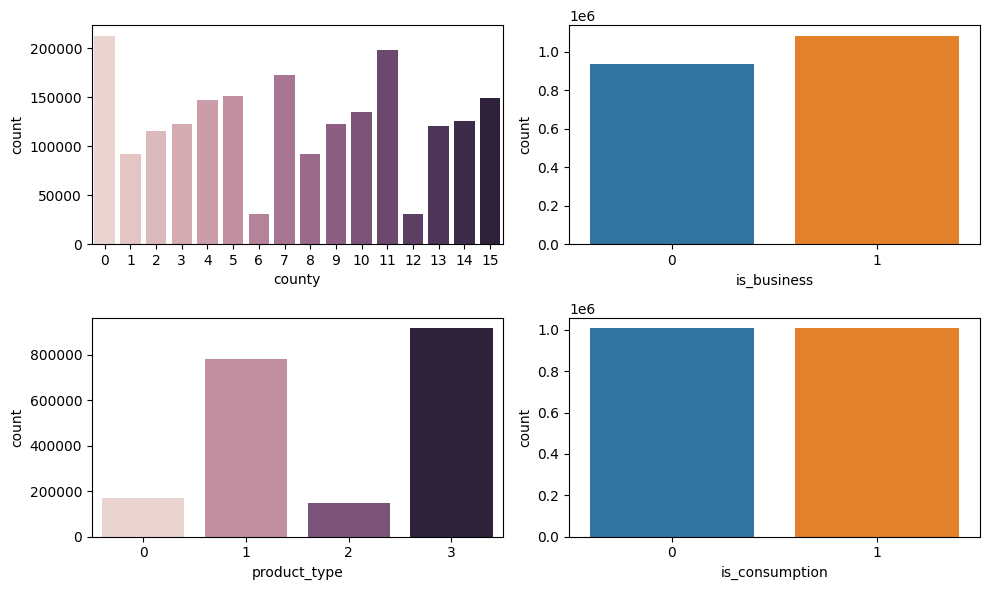

In [42]:
# There are 4 features representing catgories: county, is_business, product_type, is_consumption
# check the count for each category in this features
categorical_features = ["county", "is_business", "product_type", "is_consumption"]

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs = axs.flatten()

for index, col in enumerate(categorical_features):
    _ = sns.countplot(data=train_data, x=col, hue=col, ax=axs[index], legend=False)

_ = fig.tight_layout()

* We see that the country 6 and 12 are less represented in the data and the county 0 is the one with most instances.

* Both business and consumption category features are well balanced across the data

* Counties use more the product types 1 and 3 compared to the type 0 and 2.

<Axes: xlabel='county', ylabel='count'>

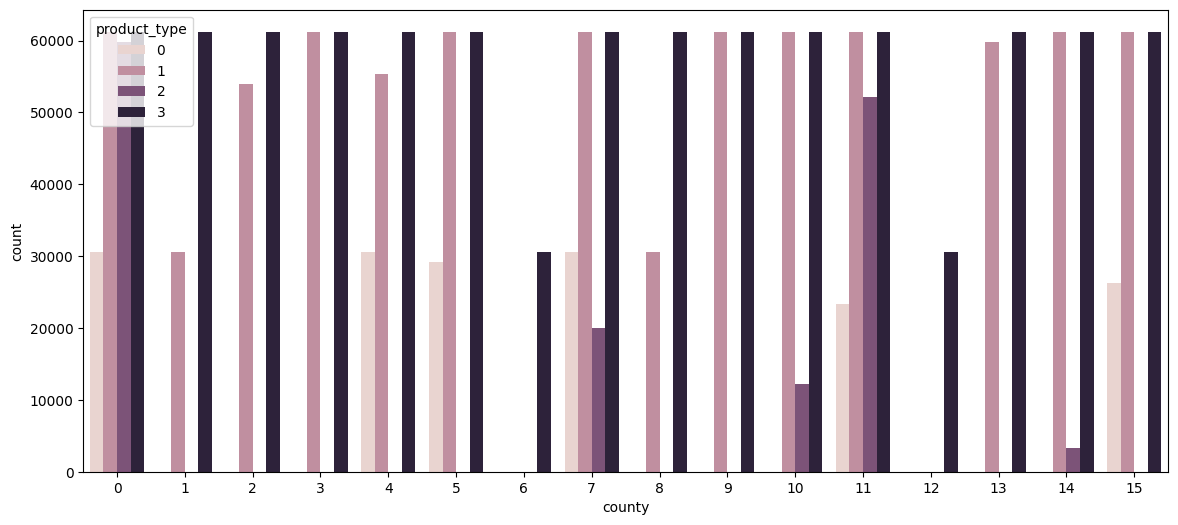

In [43]:
# check product type for each county
plt.figure(figsize=(14, 6))
sns.countplot(data=train_data, x='county', hue='product_type')

* We see that the product types 1 & 3 are used in all the counties while type 1 is not used only in county 6 & 12, and the prodcut types 0 & 2 are only present in few counties.

* We find that only county 0, 7 & 11 have all product types used.

<Axes: xlabel='county', ylabel='count'>

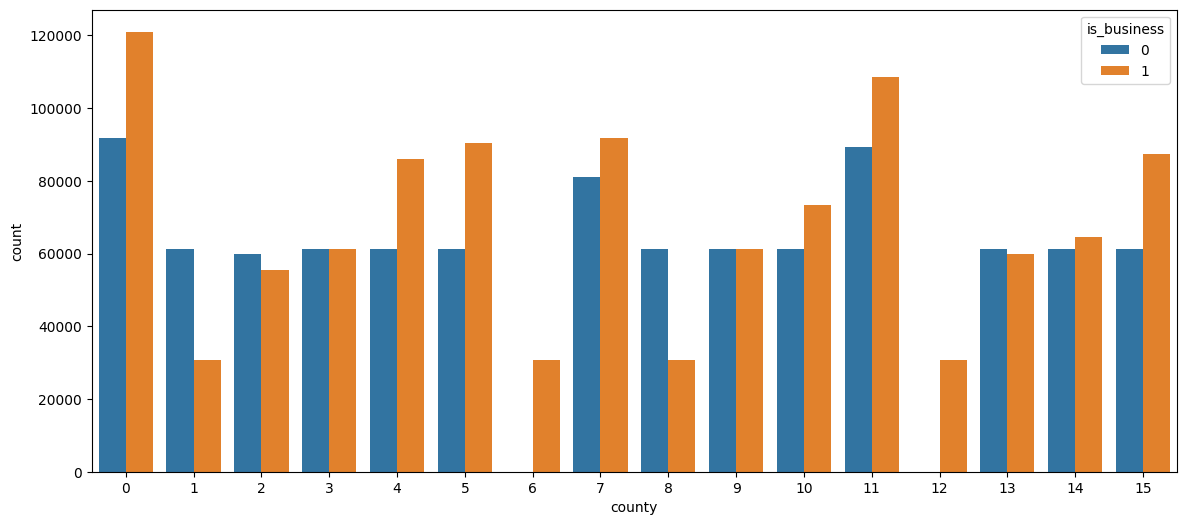

In [44]:
# check business for each county
plt.figure(figsize=(14, 6))
sns.countplot(data=train_data, x='county', hue='is_business')

* The business category is relatively balanced across all counties meaning that prosumers are both business and private individuals except for county 1 and 8 where there are less businesses, we also see that in the county 6 & 12 there is only businesses.

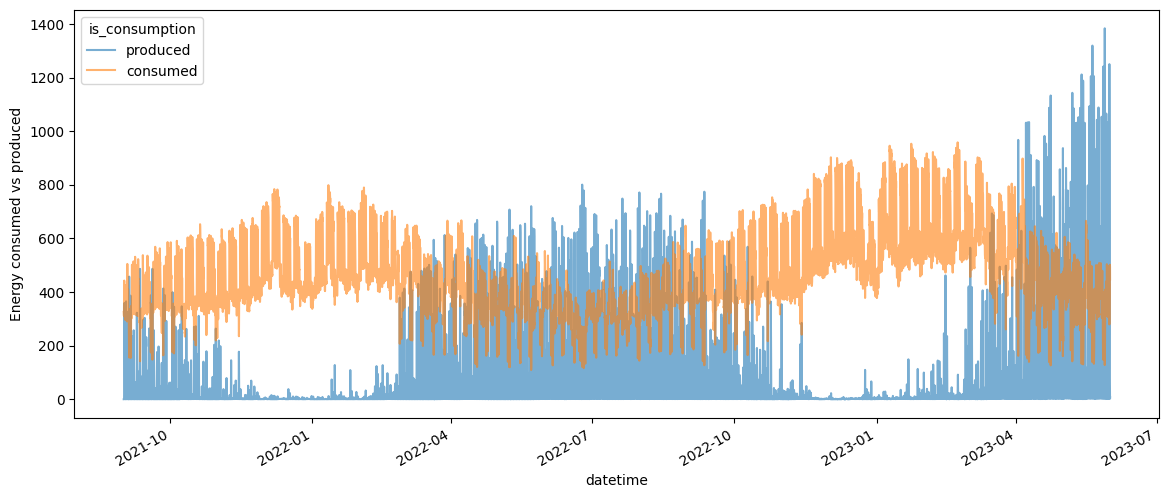

In [45]:
# target column represent the amount of energy consumed vs produced for each segment/hour
# let's see how energy amounts evolve on average
train_data["datetime"] = pd.to_datetime(train_data["datetime"], format='%Y-%m-%d %H:%M:%S')
avg_target = train_data.groupby(['datetime','is_consumption'])['target'].mean() \
                       .unstack().rename({0: 'produced', 1:'consumed'}, axis=1)

avg_target.plot(figsize=(14, 6), alpha=0.6)
_ = plt.ylabel('Energy consumed vs produced')

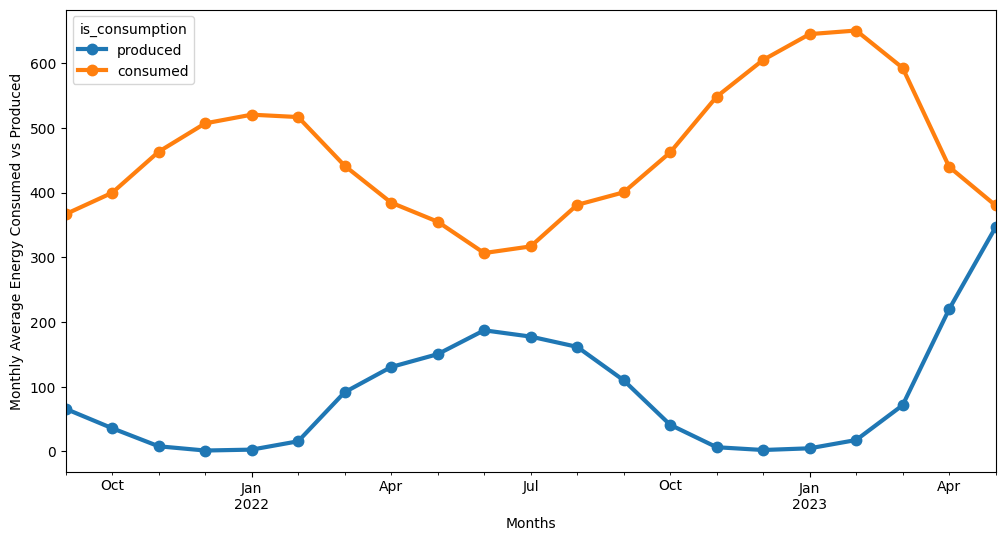

In [46]:
# plot of monthly average energy
avg_target.resample('M').mean().plot(figsize=(12,6), linewidth=3, marker=".", markersize=15)
plt.xlabel("Months")
_ = plt.ylabel('Monthly Average Energy Consumed vs Produced')

In the two charts above, we notice a pattern in energy consumption and production. During the autumn/winter months (October-February), production goes down while consumption goes up. This can be explained by people and businesses using more energy for heating, and there is less sunlight during this time.

In contrast, during the spring/summer (March-September) months, the opposite happens. There is an increase in energy production due to higher temperatures (less need for heating) and more sunlight, leading to a decrease in energy consumption.

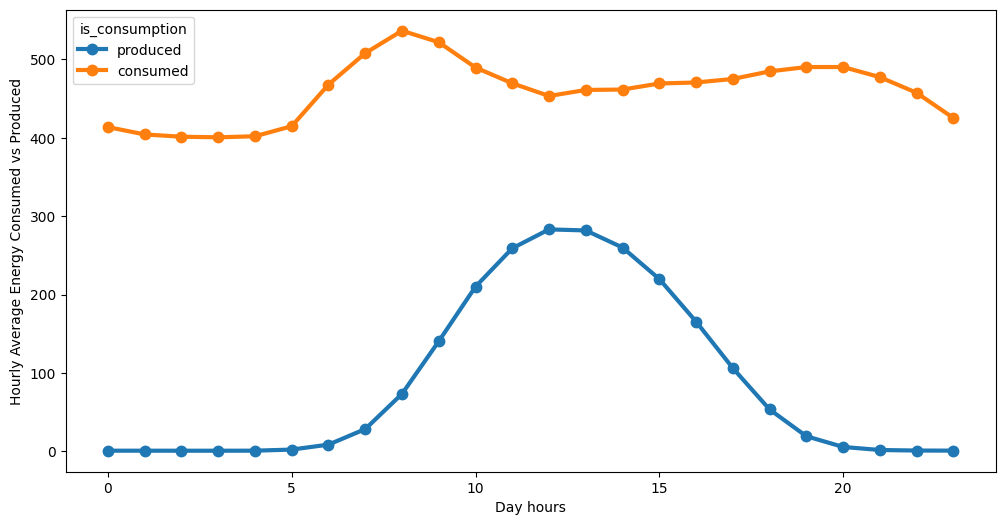

In [47]:
avg_target.groupby(avg_target.index.hour).mean().plot(figsize=(12, 6), linewidth=3, marker=".", markersize=15)
plt.xlabel("Day hours")
_ = plt.ylabel("Hourly Average Energy Consumed vs Produced")

We observe that energy production rises during daylight hours, which aligns with expectations for PV panels.

Energy consumption shows a slight increase in the early daytime hours, remains fairly constant throughout the day, and decreases at night. This behavior is in line with the typical pattern we would anticipate.

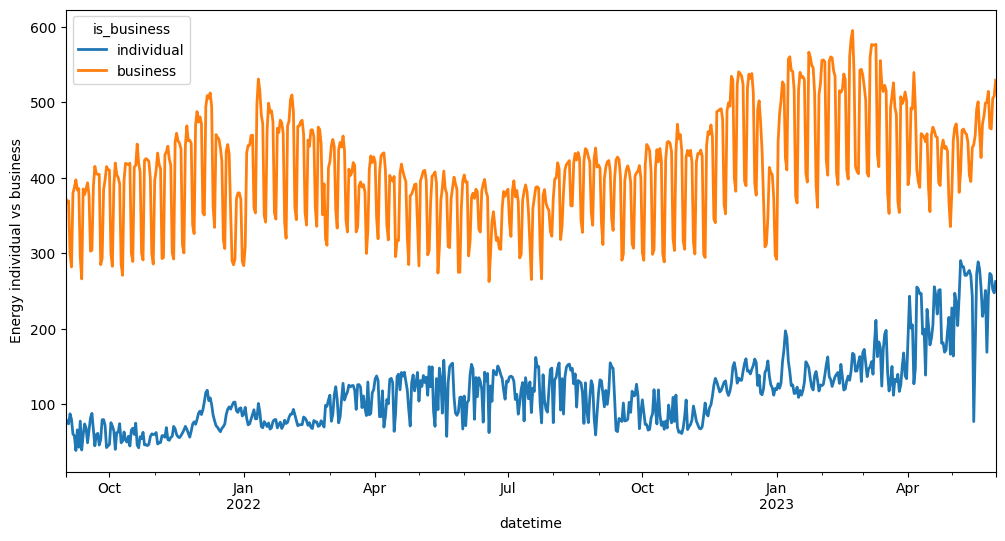

In [48]:
avg_target_business = train_data.groupby(['datetime','is_business'])['target'].mean() \
                       .unstack().rename({0: 'individual', 1:'business'}, axis=1)

avg_target_business.resample('D').mean().plot(figsize=(12,6), linewidth=2)
_ = plt.ylabel('Energy individual vs business')

The energy participation, whether it's consumption or production, is higher for businesses compared to individuals. This is expected because individuals typically generate power from their small rooftops and consume only enough energy for their own houses. On the other hand, businesses have larger facilities, including bigger rooftops in manufacturing factories, and they consume significantly more energy in their operations.

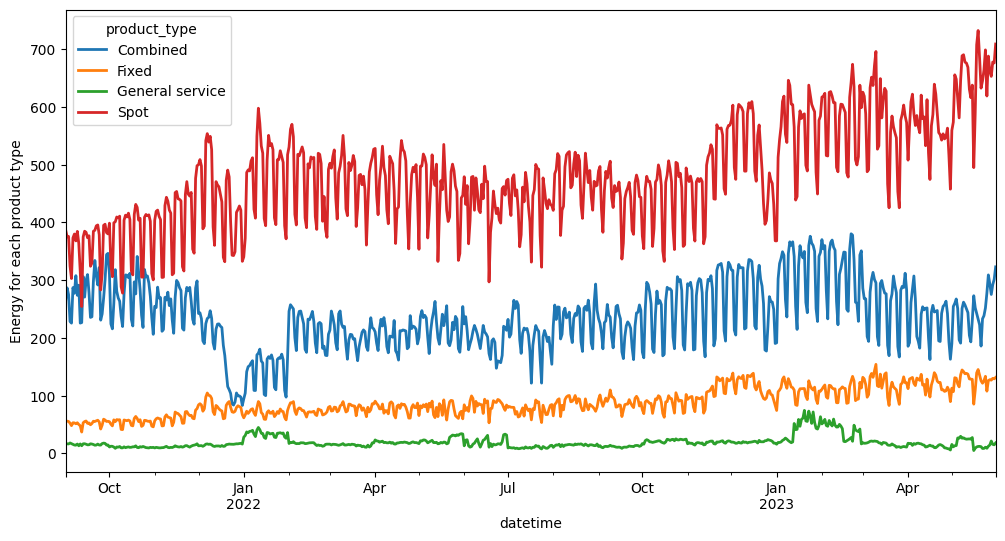

In [49]:
avg_target_product = train_data.groupby(['datetime','product_type'])['target'].mean() \
                       .unstack().rename({0: "Combined", 1: "Fixed", 2: "General service", 3: "Spot"}, axis=1)

avg_target_product.resample('D').mean().plot(figsize=(12,6), linewidth=2)
_ = plt.ylabel('Energy for each product type')

Even though we've seen earlier that the product types 1 & 3 are the most used for counties, we see here that the types 0 & 3 are the one that participate more in the energy consumption/production while the the types 1 & 2 doesn't contribute as much especially type 2.

##  Electricity Prices Data

In [7]:
# explore electricity prices data
prices_data = pd.read_csv("./predict-energy-behavior-of-prosumers/electricity_prices.csv")

In [53]:
prices_data.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


In [54]:
prices_data.shape

(15286, 4)

In [55]:
prices_data.dtypes

forecast_date     object
euros_per_mwh    float64
origin_date       object
data_block_id      int64
dtype: object

In [56]:
# no missing instances for this data
prices_data.isna().sum()

forecast_date    0
euros_per_mwh    0
origin_date      0
data_block_id    0
dtype: int64

In [57]:
# check for missing datetime
datetimes = pd.to_datetime(prices_data["forecast_date"], format='%Y-%m-%d %H:%M:%S').array.unique()
datetime_fullrange = pd.date_range(start=min(datetimes), end=max(datetimes), freq='1h')
print("Start date/time: ", min(datetimes))
print("End date/time: ", max(datetimes))

missing_dates = datetime_fullrange.difference(datetimes.unique())
print(f"Missing datetimes ({len(missing_dates)}): {missing_dates}")

Start date/time:  2021-09-01 00:00:00
End date/time:  2023-05-30 23:00:00
Missing datetimes (2): DatetimeIndex(['2022-03-27 02:00:00', '2023-03-26 02:00:00'], dtype='datetime64[ns]', freq=None)


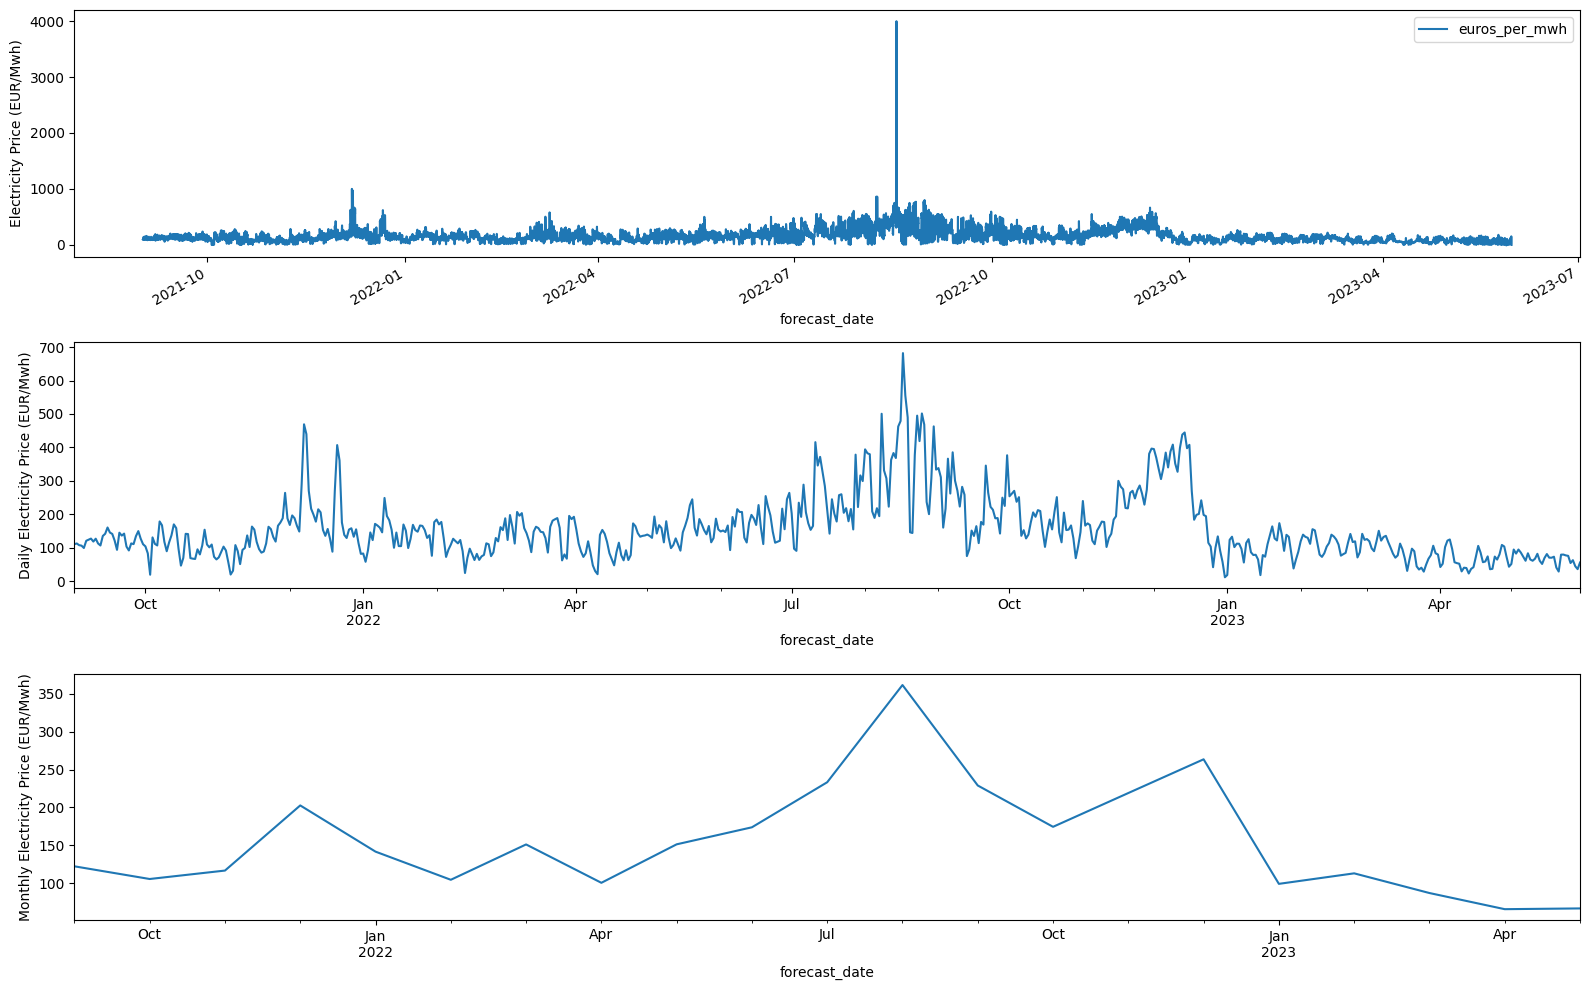

In [58]:
prices_data["forecast_date"] = pd.to_datetime(prices_data["forecast_date"], format='%Y-%m-%d %H:%M:%S')

fig, axs= plt.subplots(3, 1, figsize=(16, 10))
prices_data.plot(y="euros_per_mwh", x="forecast_date", ax=axs[0])
axs[0].set_ylabel("Electricity Price (EUR/Mwh)")
# average price per day
prices_data.resample('D', on="forecast_date").mean(numeric_only=True)["euros_per_mwh"].plot(ax=axs[1])
axs[1].set_ylabel("Daily Electricity Price (EUR/Mwh)")
# average price per month
prices_data.resample('M', on="forecast_date").mean(numeric_only=True)["euros_per_mwh"].plot(ax=axs[2])
axs[2].set_ylabel("Monthly Electricity Price (EUR/Mwh)")

_ = plt.tight_layout()

The electricity price tends to fluctuate around the range of 100-120 EUR/MWh. However, notable spikes are observed in the months of November and December, as well as in August and September.

##  Gas Prices Data

In [8]:
# explore gas prices data
gas_prices = pd.read_csv("./predict-energy-behavior-of-prosumers/gas_prices.csv")

In [80]:
gas_prices.head()

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5


In [87]:
print("shape:", gas_prices.shape)
print("columns types:\n", gas_prices.dtypes)

shape: (637, 5)
columns types:
 forecast_date             object
lowest_price_per_mwh     float64
highest_price_per_mwh    float64
origin_date               object
data_block_id              int64
dtype: object


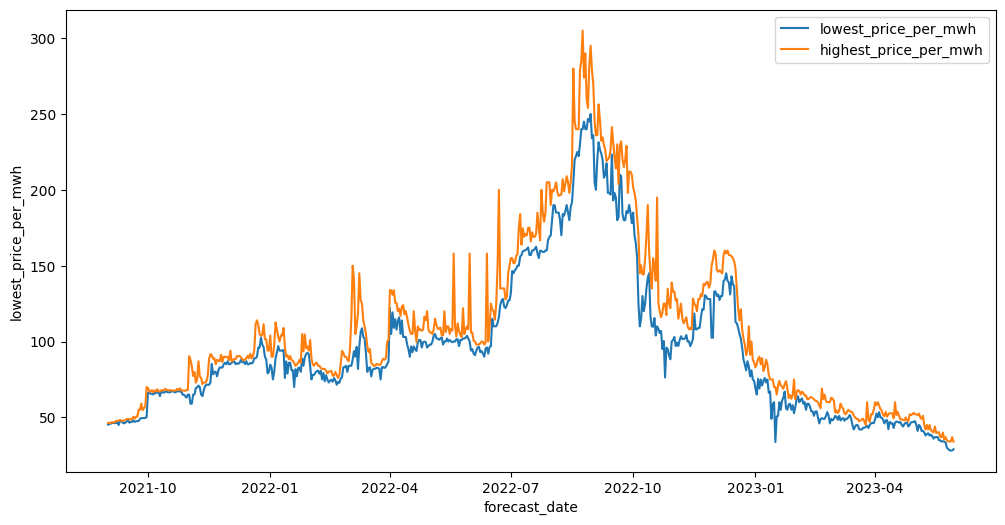

In [6]:
gas_prices["forecast_date"] = pd.to_datetime(gas_prices["forecast_date"])
price_cols = ["lowest_price_per_mwh", "highest_price_per_mwh"]

fig = plt.figure(figsize=(12, 6))
for col in price_cols:
  sns.lineplot(data=gas_prices, x="forecast_date", y=col, label=col)

##  Client Information Data

In [9]:
client_data = pd.read_csv("./predict-energy-behavior-of-prosumers/client.csv")

In [69]:
client_data.head()

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2


In [70]:
client_data.shape

(41919, 7)

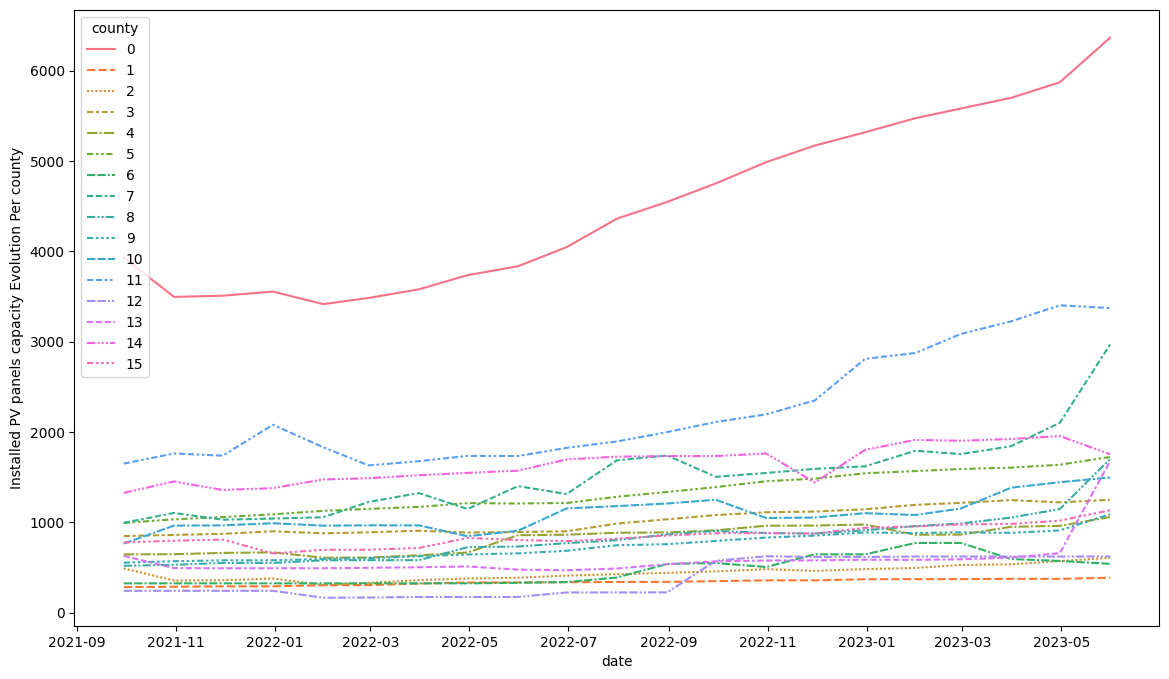

In [71]:
client_data["date"] = pd.to_datetime(client_data["date"], format='%Y-%m-%d')

plt.figure(figsize=(14, 8))
sns.lineplot(client_data.groupby(["date", "county"]).mean(numeric_only=True).unstack()["installed_capacity"].resample("M").mean())
_ = plt.ylabel("Installed PV panels capacity Evolution Per county")

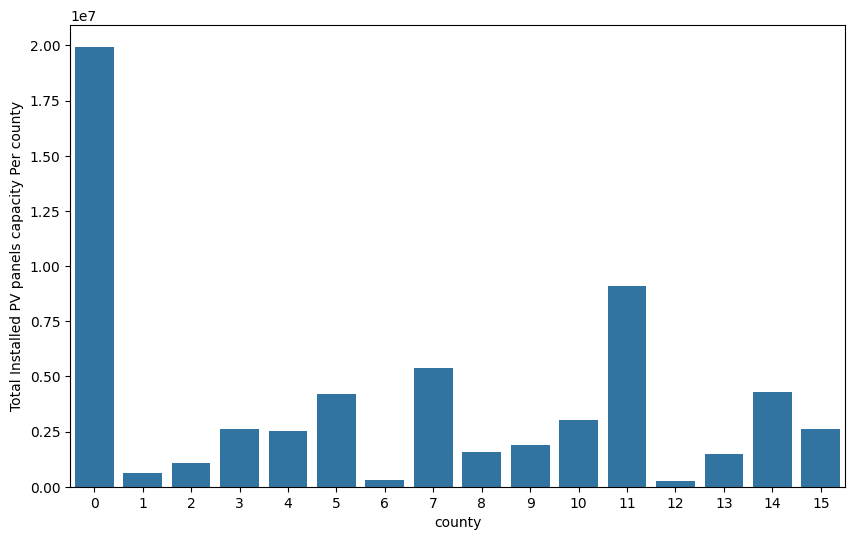

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(client_data.groupby(["county"]).sum(numeric_only=True).unstack()["installed_capacity"], legend=False)
_ = plt.ylabel("Total Installed PV panels capacity Per county")

The two plots indicate that County 0 surpasses all other counties in terms of total installed PV capacity, reaching up to 6000. Additionally, Counties 7 and 11 have approximately 3000 PV capacity installed, while the remaining counties have capacities ranging between 200 and 2000.

It is noteworthy that the installed capacity is steadily increasing over time for Counties 0, 7, and 11.

##  Historical Weather Data

In [10]:
# explore historical weather data
historical_weather_data = pd.read_csv("./predict-energy-behavior-of-prosumers/historical_weather.csv")

In [74]:
historical_weather_data.head()

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,14.2,11.6,0.0,0.0,1015.9,31,31,0,11,7.083333,8,0.0,0.0,0.0,57.6,21.7,1.0
1,2021-09-01 00:00:00,13.9,11.5,0.0,0.0,1010.7,33,37,0,0,5.111111,359,0.0,0.0,0.0,57.6,22.2,1.0
2,2021-09-01 00:00:00,14.0,12.5,0.0,0.0,1015.0,31,34,0,0,6.333333,355,0.0,0.0,0.0,57.6,22.7,1.0
3,2021-09-01 00:00:00,14.6,11.5,0.0,0.0,1017.3,0,0,0,0,8.083333,297,358.0,277.0,81.0,57.6,23.2,1.0
4,2021-09-01 00:00:00,15.7,12.9,0.0,0.0,1014.0,22,25,0,0,8.416667,5,0.0,0.0,0.0,57.6,23.7,1.0


In [75]:
# There are no missing instances
historical_weather_data.isna().sum()

datetime                  0
temperature               0
dewpoint                  0
rain                      0
snowfall                  0
surface_pressure          0
cloudcover_total          0
cloudcover_low            0
cloudcover_mid            0
cloudcover_high           0
windspeed_10m             0
winddirection_10m         0
shortwave_radiation       0
direct_solar_radiation    0
diffuse_radiation         0
latitude                  0
longitude                 0
data_block_id             0
dtype: int64

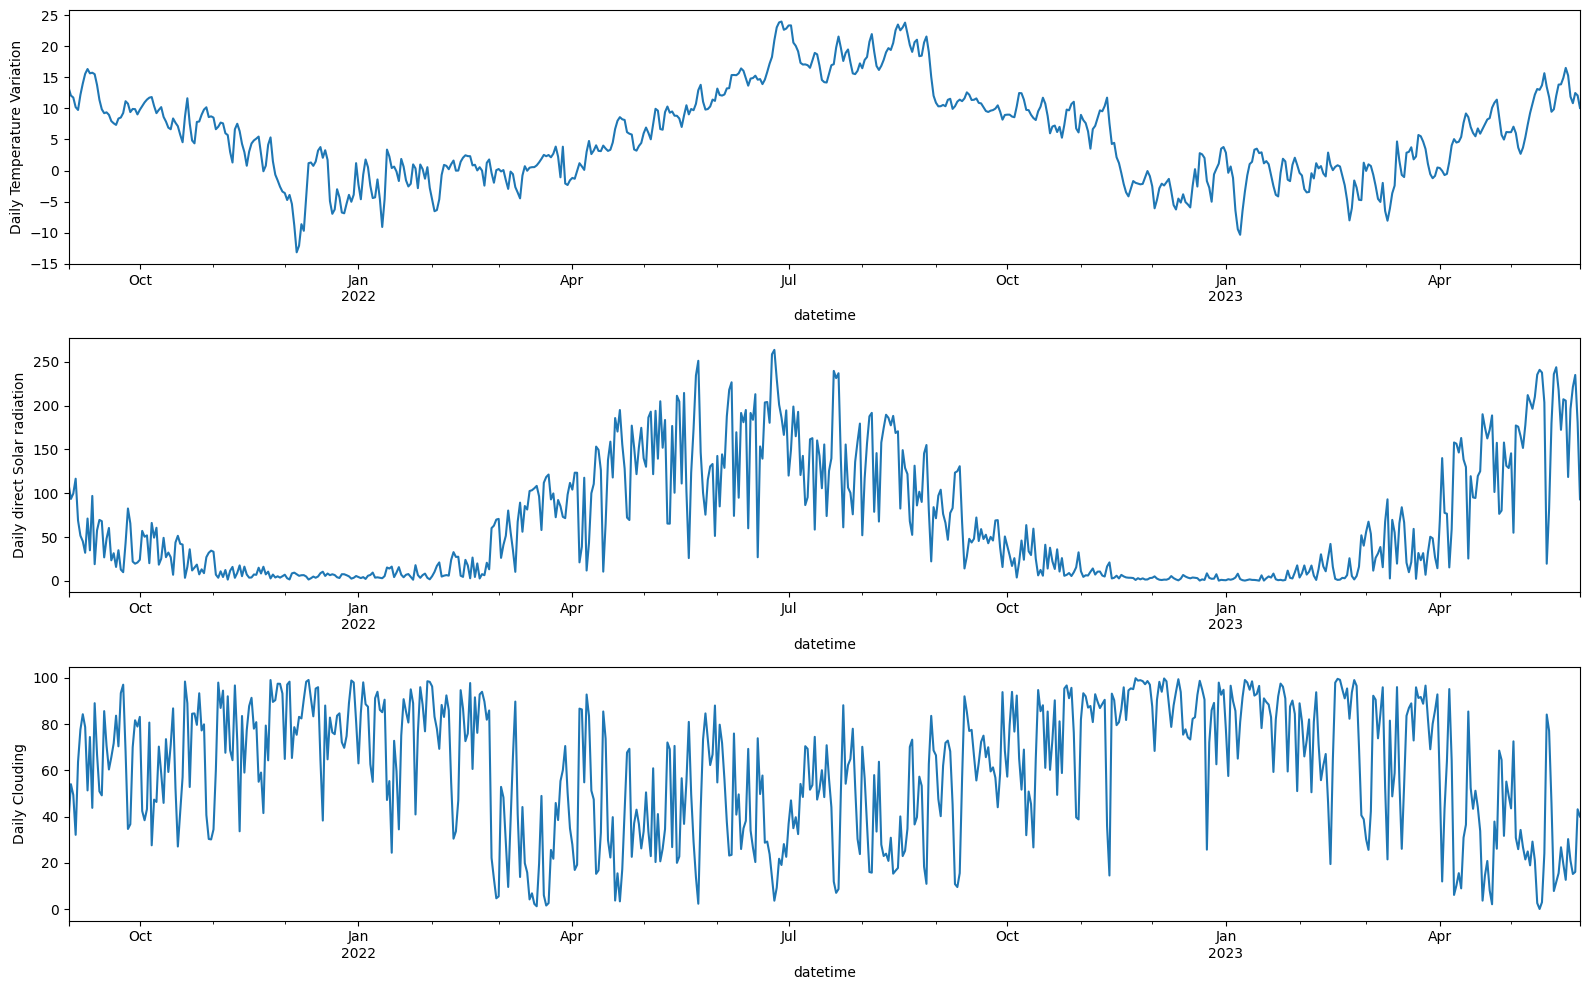

In [76]:
historical_weather_data["datetime"] = pd.to_datetime(historical_weather_data["datetime"], format='%Y-%m-%d %H:%M:%S')

fig, axs= plt.subplots(3, 1, figsize=(16, 10))
historical_weather_data.resample('D', on="datetime").mean(numeric_only=True)["temperature"].plot(ax=axs[0])
axs[0].set_ylabel("Daily Temperature Variation")
historical_weather_data.resample('D', on="datetime").mean(numeric_only=True)["direct_solar_radiation"].plot(ax=axs[1])
axs[1].set_ylabel("Daily direct Solar radiation")
historical_weather_data.resample('D', on="datetime").mean(numeric_only=True)["cloudcover_total"].plot(ax=axs[2])
axs[2].set_ylabel("Daily Clouding")

_ = plt.tight_layout()

We see that the solar radiation received and temperature drops in the winter/autumn periods which explain perfectly our previous observations concerning the pattern in the energy production vs consumptions. We also that the clouds are more present in that period (which is normal).

##  Forecast Weather Data

In [11]:
# explore forecast weather data
forecast_data = pd.read_csv("./predict-energy-behavior-of-prosumers/forecast_weather.csv")

In [39]:
forecast_data.head()

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,57.6,21.7,2021-09-01 02:00:00,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
1,57.6,22.2,2021-09-01 02:00:00,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
2,57.6,22.7,2021-09-01 02:00:00,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
3,57.6,23.2,2021-09-01 02:00:00,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
4,57.6,23.7,2021-09-01 02:00:00,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0


The features present in this dataset are the same as the ones in the historical weather dataset except those are the forecast weather data that we should have when we make the energy predictions.

##  Data Preprocessing

In [27]:
class DataPreprocessor:
    def __init__(self):
          # latitude & longitude columns
          self.lat_lon_columns = ['latitude', 'longitude']

          # categorical columns (needed for XGBoost model)
          self.categorical_columns = ['county', 'is_business', 'product_type', 'is_consumption', 'data_block_id']

    def extract_datetime_features_from_train_data(self, data):
          # Convert to pandas datetime
          data['datetime'] = pd.to_datetime(data['datetime'])

          # Extract date/time features from datetime column
          data['hour'] = data.datetime.dt.hour
          data['week'] = data.datetime.dt.isocalendar().week.astype("int")
          data['month'] = data.datetime.dt.month
          data['year'] = data.datetime.dt.year
          data['dayofweek'] = data.datetime.dt.dayofweek
          data['dayofyear'] = data.datetime.dt.dayofyear

          return data

    def create_client_features(self, client):
        # Drop columns
        client = client.drop(['date'], axis=1)

        # change columns name to distinguish client features
        unchanged_cols = ['county', 'is_business', 'product_type', 'data_block_id']
        return _change_columns_names(client, prefix='client_', columns_no_change=unchanged_cols)

    def create_electricity_features(self, electricity):
        # Convert to pandas datetime
        electricity['forecast_date'] = pd.to_datetime(electricity['forecast_date'])

        # must offset by 1 day as in Test set
        electricity['datetime'] = electricity['forecast_date'] + pd.DateOffset(1)

        # Drop columns
        electricity = electricity.drop(['forecast_date', 'origin_date'], axis=1)

        # change columns name to distinguish elect prices features
        unchanged_cols = ['datetime', 'data_block_id']
        return _change_columns_names(electricity, prefix='electricity_', columns_no_change=unchanged_cols)

    def create_gas_features(self, gas):
        # Drop columns
        gas = gas.drop(['forecast_date', 'origin_date'], axis=1)

        # change columns name to distinguish gas prices features
        unchanged_cols = ['data_block_id']
        return _change_columns_names(gas, prefix='gas_', columns_no_change=unchanged_cols)

    def create_weather_features(self, weather_data, forecast=False):
        # Rename & Convert to pandas datetime
        if forecast:
            weather_data = weather_data.rename(columns={'forecast_datetime': 'datetime'})
            weather_data = weather_data.drop('origin_datetime', axis=1)
        weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

        # Replace Latitude/langitude columns with respective county code
        weather_data[self.lat_lon_columns] = weather_data[self.lat_lon_columns].astype(float).round(1)
        weather_data = weather_data.merge(location, how="left", on=self.lat_lon_columns)

        # Drop latitude & longitude columns
        weather_data = weather_data.drop(self.lat_lon_columns, axis=1)

        # change columns name to distinguish historical weather features
        unchanged_cols = ['datetime', 'data_block_id', 'county'] + self.lat_lon_columns
        prefix = 'fw_' if forecast else 'hw_'
        weather_data = _change_columns_names(weather_data, prefix=prefix, columns_no_change=unchanged_cols)

        # Group weather data by ['datetime', 'data_block_id', 'county'] & calculate mean values
        columns = [col for col in weather_data.columns if col not in unchanged_cols]
        weather_data = weather_data.groupby(['datetime', 'data_block_id', 'county']).mean().reset_index()

        if not forecast:
            # For historical_weather data in test set has 1 day offset for hour<11 and 2 day offset for hour>11
            weather_data['hour_h'] = weather_data['datetime'].dt.hour
            weather_data['datetime'] = weather_data.apply(lambda x: x['datetime'] + pd.DateOffset(1)
                                                  if x['hour_h']< 11 else x['datetime'] + pd.DateOffset(2), axis=1)

        return weather_data

    def create_dataframe(self, train, client, historical_weather, forecast_weather, electricity, gas):
        # Create features
        train_data = self.extract_datetime_features_from_train_data(train)
        client = self.create_client_features(client)
        historical_weather = self.create_weather_features(historical_weather, forecast=False)
        forecast_weather = self.create_weather_features(forecast_weather, forecast=True)
        electricity = self.create_electricity_features(electricity)
        gas = self.create_gas_features(gas)

        # Combine the different features into one dataframe
        df = train_data.merge(client, how='left', on=['county', 'is_business', 'product_type', 'data_block_id'])
        df = df.merge(historical_weather, how='left', on=['datetime', 'data_block_id', 'county'])
        df = df.merge(forecast_weather, how='left', on=['datetime', 'data_block_id', 'county'])
        df = df.merge(electricity, how='left', on=['datetime', 'data_block_id'])
        df = df.merge(gas, how='left', on=['data_block_id'])

        # Change columns to categorical for XGBoost
        df[self.categorical_columns] = df[self.categorical_columns].astype('category')
        return df


def _change_columns_names(df, prefix, columns_no_change):
    '''Change columns names by adding a prefix, don not update columns name for columns_no_change'''
    df.columns = [prefix + col if col not in columns_no_change else col for col in df.columns]
    return df

def flatten_multi_index_df(df):
    df.columns = ['_'.join([col for col in multi_col if len(col)>0])
                  for multi_col in df.columns]
    return df

In [44]:
# Create global dataframe
processor = DataPreprocessor()
data = processor.create_dataframe(train=train_data.copy(),
                                  client = client_data.copy(),
                                  historical_weather = historical_weather_data.copy(),
                                  forecast_weather = forecast_data.copy(),
                                  electricity = prices_data.copy(),
                                  gas = gas_prices.copy()
                                  )

In [45]:
# function to create past revealed_targets for train set based on number of lagging days
def create_revealed_targets_train(data, lag):
    original_datetime = data['datetime']
    revealed_targets = data[['datetime', 'prediction_unit_id', 'is_consumption', 'target']].copy()

    for day_lag in range(2, lag+1):
        revealed_targets['datetime'] = original_datetime + pd.DateOffset(day_lag)
        data = data.merge(revealed_targets, how='left', on = ['datetime', 'prediction_unit_id', 'is_consumption'],
                          suffixes = ('', f'_{day_lag}_days_ago'))
    return data

In [46]:
# add revealed targets to dataframe
df = create_revealed_targets_train(data.copy(), lag=15)

In [47]:
# Drop null target values
target = 'target'
df = df[~df[target].isna()].reset_index(drop=True)

train_block_id = list(range(0, 600))

train_set = df[df['data_block_id'].isin(train_block_id)]
test_set = df[~df['data_block_id'].isin(train_block_id)]

In [48]:
# Remove target & datetime from data features
features = list(train_set.columns)
features.remove('target')
features.remove('datetime')

In [51]:
import xgboost as xgb

clf = xgb.XGBRegressor(n_estimators=200, enable_categorical=True, objective='reg:absoluteerror', early_stopping_rounds=50)

In [52]:
clf.fit(X=train_set[features], y=train_set[target],
        eval_set = [(train_set[features], train_set[target]), (test_set[features], test_set[target])],
        verbose=True)

[0]	validation_0-mae:241.28667	validation_1-mae:313.92111
[1]	validation_0-mae:216.01042	validation_1-mae:284.89636
[2]	validation_0-mae:191.50547	validation_1-mae:261.49353
[3]	validation_0-mae:170.73913	validation_1-mae:234.94964
[4]	validation_0-mae:154.35726	validation_1-mae:216.23151
[5]	validation_0-mae:140.89348	validation_1-mae:202.19749
[6]	validation_0-mae:125.62121	validation_1-mae:183.87456
[7]	validation_0-mae:106.96494	validation_1-mae:162.24072
[8]	validation_0-mae:91.40609	validation_1-mae:143.48690
[9]	validation_0-mae:80.10435	validation_1-mae:135.45583
[10]	validation_0-mae:72.68602	validation_1-mae:126.45141
[11]	validation_0-mae:67.34690	validation_1-mae:120.30635
[12]	validation_0-mae:64.08173	validation_1-mae:117.64791
[13]	validation_0-mae:60.84577	validation_1-mae:115.24901
[14]	validation_0-mae:58.71706	validation_1-mae:114.95303
[15]	validation_0-mae:57.69434	validation_1-mae:113.87591
[16]	validation_0-mae:56.58745	validation_1-mae:112.31431
[17]	validation_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, objective='reg:absoluteerror', ...)

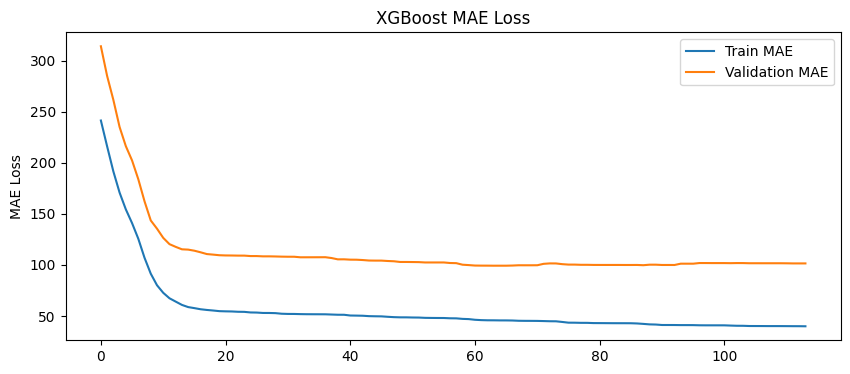

In [53]:
# Plot errors
results = clf.evals_result()
train_mae, test_mae = results["validation_0"]["mae"], results["validation_1"]["mae"]
x_values = range(0, len(train_mae))

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x_values, train_mae, label="Train MAE")
ax.plot(x_values, test_mae, label="Validation MAE")
ax.legend()
plt.ylabel("MAE Loss")
plt.title("XGBoost MAE Loss")
plt.show()

<Axes: xlabel='importance', ylabel='name'>

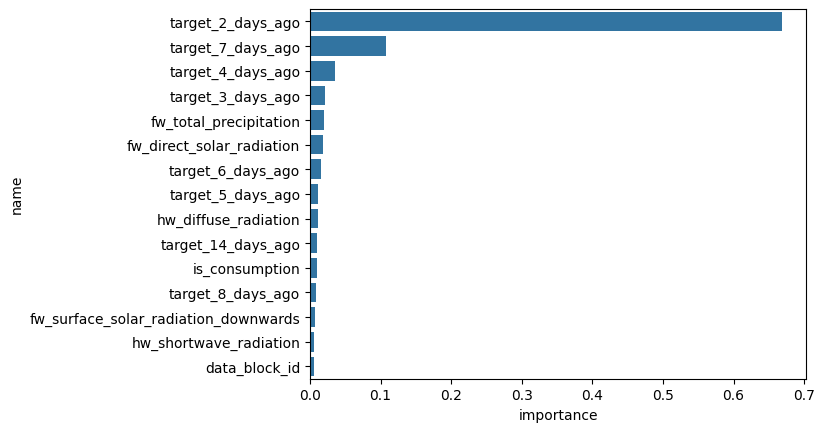

In [54]:
# explore features importance
importance_data = pd.DataFrame({'name': clf.feature_names_in_, 'importance': clf.feature_importances_})
importance_data = importance_data.sort_values(by='importance', ascending=False)

sns.barplot(data=importance_data[0:15], x="importance", y="name")